# Fetching Dataset 

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
x, y= mnist['data'],mnist['target']

In [4]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
x.shape

(70000, 784)

In [7]:
y.shape

(70000,)

In [8]:
%matplotlib inline

In [9]:
import matplotlib
import matplotlib.pyplot as plt

In [10]:
some_digit = x[36001]
some_digit_image = some_digit.reshape(28,28) # lets reshape it to plot it


(-0.5, 27.5, 27.5, -0.5)

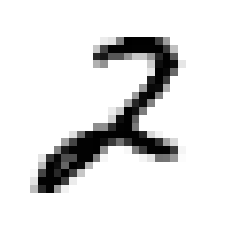

In [11]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")

In [12]:
y[36001]

'2'

In [13]:
x_train,x_test = x[:60000],x[60000:]

In [14]:
y_train,y_test = y[:60000],y[60000:]

In [15]:
import numpy as np
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

# Creating a 2 Detector

In [16]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train==2)
y_test_2 =(y_test==2)

In [17]:
y_train

array([1, 3, 4, ..., 4, 9, 9], dtype=int8)

# Add a classifier 

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
clf = LogisticRegression()

In [20]:
clf.fit(x_train,y_train_2)

C:\Users\jatin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
clf.predict([some_digit])

array([ True])

In [22]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")

C:\Users\jatin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jatin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [23]:
a.mean()

0.9779666666666667

In [24]:
import pickle
with open('Digit HandWritten.pickle','wb') as f:
    pickle.dump(clf,f)

In [28]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf,x_train,y_train_2,cv=3)

C:\Users\jatin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jatin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [29]:
y_train_pred

array([False, False, False, ..., False, False, False])

# Calculating  confusion matrix

In [30]:
from sklearn.metrics import confusion_matrix

In [32]:
confusion_matrix(y_train_2, y_train_pred)

array([[53548,   494],
       [  828,  5130]], dtype=int64)

In [33]:
confusion_matrix(y_train_2,y_train_2)#this is the confusion matrix for perfect 

array([[54042,     0],
       [    0,  5958]], dtype=int64)

# Precision and Recall

In [34]:
from sklearn.metrics import precision_score, recall_score

In [36]:
precision_score(y_train_2, y_train_pred)#this is my precision score

0.9121621621621622

In [37]:
recall_score(y_train_2, y_train_pred)

0.8610271903323263

# F1 -Score

In [39]:
from sklearn.metrics import f1_score

In [40]:
f1_score(y_train_2, y_train_pred)

0.8858573648765325

# Precision Recall Curve

In [41]:
from sklearn.metrics import precision_recall_curve

In [46]:
y_scores = cross_val_predict(clf, x_train,y_train_2, cv=3,method="decision_function")

C:\Users\jatin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jatin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [47]:
y_scores

array([ -2.80281964,  -9.65431482,  -9.5296532 , ...,  -7.50765626,
       -16.50539599, -12.85694778])

In [48]:
precision,recalls,thresholds = precision_recall_curve(y_train_2, y_scores)

In [54]:
precision

array([0.10033512, 0.10031997, 0.10032166, ..., 1.        , 1.        ,
       1.        ])

In [53]:
recalls

array([1.00000000e+00, 9.99832158e-01, 9.99832158e-01, ...,
       3.35683115e-04, 1.67841558e-04, 0.00000000e+00])

In [52]:
thresholds

array([-26.04245584, -26.04228377, -26.03690165, ...,  17.93636479,
        18.04044333,  18.601329  ])

# Plottting the  Precision Recall Curve 

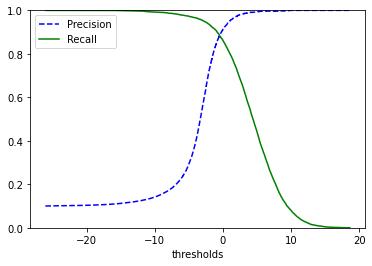

In [59]:
plt.plot(thresholds, precision[:-1], "b--",label="Precision")
plt.plot(thresholds, recalls[:-1], "g-",label="Recall")
plt.xlabel("thresholds")
plt.legend(loc="upper left")
plt.ylim([0,1])
plt.show()